In [42]:
import pandas as pd
df = pd.read_csv('Data Analytics Internship Dataset - Bazaar .csv')
df.head()

,signup_date,signup_month,store_id,acquisition_platform,first_order_date
0,2024-11-06,2024-11-01,6bgMF1zsCjjwAVSSHdY7Ob,Google,NaN
1,2024-11-16,2024-11-01,6FODsNRWURZA0iIDs8FZQu,Google,NaN
2,2024-11-01,2024-11-01,6ySwyyHo39qXTjlCMT2VLi,Facebook,NaN
3,2024-11-28,2024-11-01,S7E0LsjLwGtnOD075bNoM,Google,2024-11-28
4,2024-11-19,2024-11-01,24Z8UNZpVQWRnFZGPf5Flv,Facebook,NaN


In [44]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11578 entries, 0 to 11577
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   signup_date           11578 non-null  object
 1   signup_month          11578 non-null  object
 2   store_id              11578 non-null  object
 3   acquisition_platform  11578 non-null  object
 4   first_order_date      3271 non-null   object
dtypes: object(5)
memory usage: 452.4+ KB


signup_date                0
signup_month               0
store_id                   0
acquisition_platform       0
first_order_date        8307
dtype: int64

In [46]:
df['signup_date'] = pd.to_datetime(df['signup_date'], errors='coerce')
df['first_order_date'] = pd.to_datetime(df['first_order_date'], errors='coerce')
df.dtypes

signup_date             datetime64[ns]
signup_month                    object
store_id                        object
acquisition_platform            object
first_order_date        datetime64[ns]
dtype: object

In [48]:
total_users = len(df)
converted_users = df['first_order_date'].notnull().sum()

conversion_rate = converted_users / total_users * 100
print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 28.25%


In [50]:
platform_conversion = df.groupby('acquisition_platform')['first_order_date'].apply(lambda x: x.notnull().mean() * 100)
platform_conversion = platform_conversion.sort_values(ascending=False)

platform_conversion

acquisition_platform
Organic         35.297655
Unattributed    34.541578
Tiktok          28.210117
Google          27.260126
Facebook        22.588832
Name: first_order_date, dtype: float64

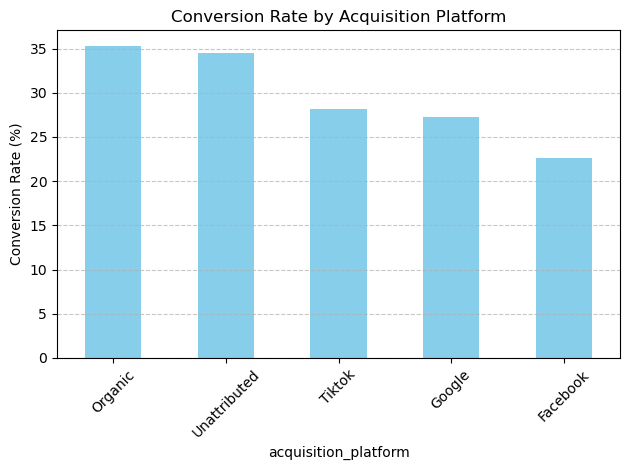

In [52]:
import matplotlib.pyplot as plt

platform_conversion.plot(kind='bar', color='skyblue')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rate by Acquisition Platform')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [54]:
paid_channels = ['Facebook', 'Google', 'Instagram', 'Tiktok']
paid_users = df[df['acquisition_platform'].isin(paid_channels)]

print(f"Users from paid channels: {len(paid_users)}")

Users from paid channels: 8977


In [56]:
most_users = df['acquisition_platform'].value_counts()
print("Users acquired by channel:\n", most_users)

Users acquired by channel:
 acquisition_platform
Google          6493
Facebook        1970
Organic         1663
Unattributed     938
Tiktok           514
Name: count, dtype: int64


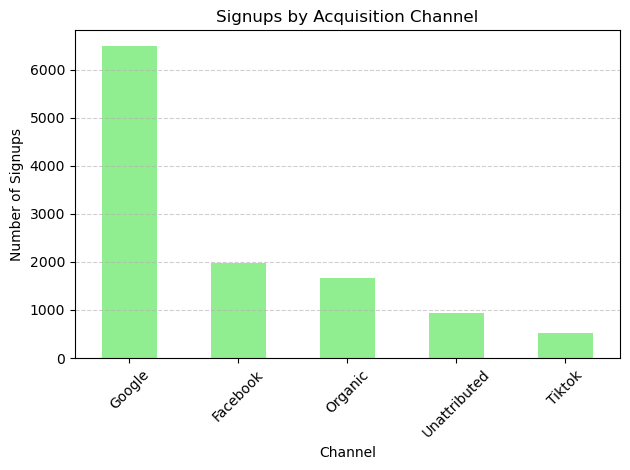

In [58]:
signup_counts = df['acquisition_platform'].value_counts()

signup_counts.plot(kind='bar', color='lightgreen')
plt.title('Signups by Acquisition Channel')
plt.xlabel('Channel')
plt.ylabel('Number of Signups')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

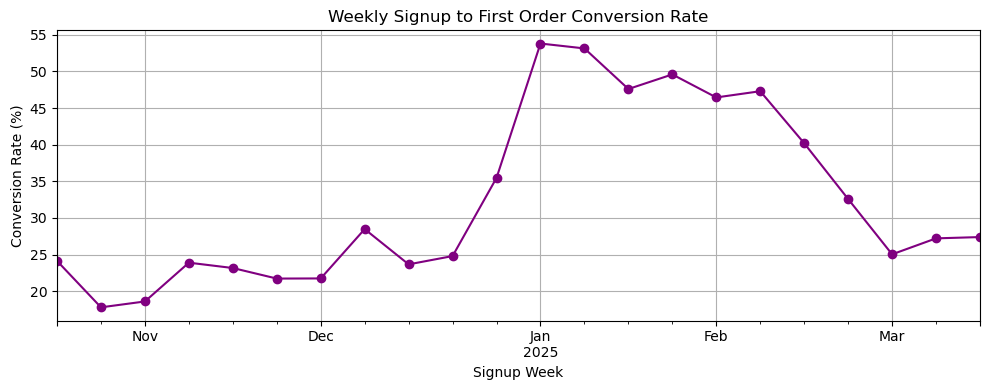

In [62]:
df['signup_week'] = df['signup_date'].dt.to_period('W').dt.start_time

weekly_data = df.groupby('signup_week').agg(
    signups=('store_id', 'count'),
    conversions=('first_order_date', lambda x: x.notnull().sum())
)

weekly_data['conversion_rate'] = (weekly_data['conversions'] / weekly_data['signups']) * 100

weekly_data['conversion_rate'].plot(marker='o', linestyle='-', figsize=(10, 4), color='purple')
plt.title('Weekly Signup to First Order Conversion Rate')
plt.xlabel('Signup Week')
plt.ylabel('Conversion Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [64]:
print(df.columns.tolist())

['signup_date', 'signup_month', 'store_id', 'acquisition_platform', 'first_order_date', 'signup_week']


In [66]:
paid_users = df[df['acquisition_platform'].str.lower() == 'paid']
print(f"Paid Channel Signups: {len(paid_users)}")

Paid Channel Signups: 0


In [68]:
percent_converted = df['first_order_date'].notnull().mean() * 100
print(f"Users with at least one order: {percent_converted:.2f}%")

Users with at least one order: 28.25%


In [70]:
top_channel = df['acquisition_platform'].value_counts().idxmax()
print(f"Most users acquired via: {top_channel}")

Most users acquired via: Google


/var/folders/bc/x8bt8nzs3msd05t0c0vfy72c0000gn/T/ipykernel_1519/3450069245.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekly = df.groupby('signup_week').apply(lambda x: x['first_order_date'].notnull().mean() * 100)


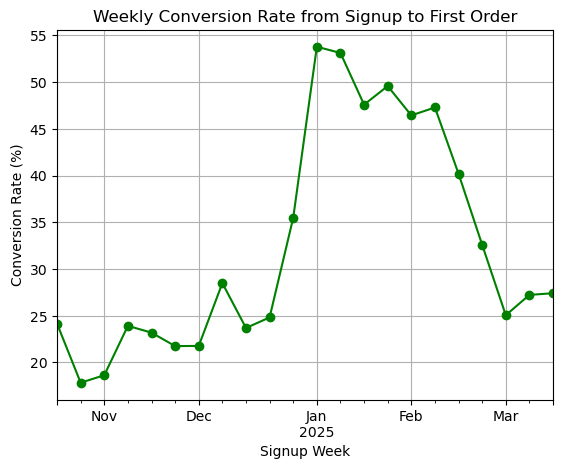

In [72]:
weekly = df.groupby('signup_week').apply(lambda x: x['first_order_date'].notnull().mean() * 100)

weekly.plot(kind='line', marker='o', color='green')
plt.title('Weekly Conversion Rate from Signup to First Order')
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Signup Week')
plt.grid(True)
plt.show()